### Modelado

In [ ]:
pip install statsmodels

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.3 MB/s eta 0:00:00a 0:00:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install lightgbm

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install skfeature-chappers

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression  # Import SelectKBest

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
import multiprocessing

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', None)

In [ ]:
X_train = pd.read_csv('X_train.csv.gz')
X_test = pd.read_csv('X_test.csv.gz')
y_train = pd.read_csv('y_train.csv.gz')
y_test = pd.read_csv('y_test.csv.gz')

In [ ]:
y_train = y_train.drop(columns=['price'])
y_test = y_test.drop(columns=['price'])

In [ ]:
#selected_columns = ['accommodates','bedrooms', 'bathrooms_count' ,'number_of_reviews',
                              #'availability_30',
                              #'antiguedad', 'host_is_superhost_encoded','room_type_encoded', 'amenity_count', 'neighbourhood_cleansed_encoded', 'month']

X_train_reg =  X_train.drop(['date', 'latitude', 'longitude', 'available', 'host_is_superhost', 'amenities', 'neighbourhood_cleansed', 'room_type'], axis=1)
X_test_reg = X_test.drop(['date', 'latitude', 'longitude', 'available', 'host_is_superhost', 'amenities', 'neighbourhood_cleansed', 'room_type'], axis=1)

#### Random Forest

In [ ]:
model_rf = RandomForestRegressor(random_state=42, n_jobs = -1)

k=11, Selected Features: Index(['accommodates', 'bathrooms_count', 'bedrooms', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'shared', 'room_type_encoded', 'antiguedad'],
      dtype='object'), Average Score: 0.9220674450926566
k=12, Selected Features: Index(['accommodates', 'bathrooms_count', 'bedrooms', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'shared', 'host_is_superhost_encoded',
       'room_type_encoded', 'antiguedad'],
      dtype='object'), Average Score: 0.9220877292844062
k=13, Selected Features: Index(['host_acceptance_rate', 'accommodates', 'bathrooms_count', 'bedrooms',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'shared',
       'host_is_superhost_encoded', 'room_type_encoded', 'antiguedad'],
      dtype='object'), Average Score: 0.9228033489549423
k=14, Selected Feature

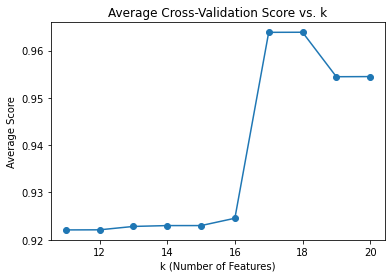

In [ ]:
# Range of k values to explore
k_values = np.arange(11, 21)
average_scores_rf = []  # Create an empty list to store average scores

for k in k_values:
    selector = SelectKBest(f_regression, k=k)
    X_new = selector.fit_transform(X_train_reg, y_train)

    scores_rf = cross_val_score(model_rf, X_new, y_train, cv=5)
    average_score_rf = scores_rf.mean()  # Fix the variable name here

    # Get the selected features
    selected_features_mask = selector.get_support()
    selected_features_rf = X_train_reg.columns[selected_features_mask]

    print(f'k={k}, Selected Features: {selected_features_rf}, Average Score: {average_score_rf}')

    # Append the average score to the list
    average_scores_rf.append(average_score_rf)

# Plot the average scores
plt.plot(k_values, average_scores_rf, marker='o')
plt.title('Average Cross-Validation Score vs. k')
plt.xlabel('k (Number of Features)')
plt.ylabel('Average Score')
plt.show()


In [ ]:
random_forest = ['host_response_rate', 'host_acceptance_rate', 'accommodates',
       'bathrooms_count', 'bedrooms', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_value', 'reviews_per_month',
       'shared', 'host_is_superhost_encoded', 'room_type_encoded', 'month',
       'antiguedad']

X_train_rf = X_train[random_forest]
X_test_rf = X_test[random_forest]

In [ ]:
# Define the hyperparameter grid for the grid search
param_grid_rf = {
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# Use KFold for cross-validation
k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=k_folds, n_jobs= multiprocessing.cpu_count() - 1)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train_rf, y_train)

# Get the best hyperparameters from the grid search
best_params_rf = grid_search_rf.best_params_

# Get the best model from the grid search
best_model_rf = grid_search_rf.best_estimator_

# Make predictions on the test set using the best model
y_train_pred_best_rf = best_model_rf.predict(X_train_rf)

# Hacer predicciones en los datos de prueba
y_test_pred_best_rf = best_model_rf.predict(X_test_rf)

In [ ]:
# Calcular MSE y R² para el conjunto de entrenamiento
mse_train_rf = mean_squared_error(y_train, y_train_pred_best_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = r2_score(y_train, y_train_pred_best_rf)

# Calcular MSE y R² para el conjunto de prueba
mse_test_rf = mean_squared_error(y_test, y_test_pred_best_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_test_pred_best_rf)

# Calcula el Mean Absolute Error (MAE) para el conjunto de entrenamiento
mae_train_rf = mean_absolute_error(y_train, y_train_pred_best_rf)

# Calcula el Mean Absolute Error (MAE) para el conjunto de prueba
mae_test_rf = mean_absolute_error(y_test, y_test_pred_best_rf)
# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(best_params_rf)

# # Imprime las métricas de evaluación para el conjunto de entrenamiento
print('Conjunto de Entrenamiento (Regresión Lineal):')
print(f'Error Cuadrático Medio: {mse_train_rf}')
print(f'Raíz del Error Cuadrático Medio: {rmse_train_rf}')
print(f'R²: {r2_train_rf}')
#print(f'Mean Absolute Error: {mae_train_rf}')
# #print('Percentage Error: {:.2f}%'.format(percentage_error_train.mean()))  # Tomar la media

# # Imprime las métricas de evaluación para el conjunto de prueba
print('\nConjunto de Prueba (Regresión Lineal):')
print(f'Error Cuadrático Medio: {mse_test_rf}')
print(f'Raíz del Error Cuadrático Medio: {rmse_test_rf}')
print(f'R²: {r2_test_rf}')
#print(f'Mean Absolute Error: {mae_test}')



Best Hyperparameters:
{'min_samples_leaf': 4, 'min_samples_split': 2}
Conjunto de Entrenamiento (Regresión Lineal):
Error Cuadrático Medio: 0.02911263938982635
Raíz del Error Cuadrático Medio: 0.17062426377812256
R²: 0.9671952549347638

Conjunto de Prueba (Regresión Lineal):
Error Cuadrático Medio: 0.03163430151885771
Raíz del Error Cuadrático Medio: 0.17786034273794063
R²: 0.9642524233550992


In [ ]:
importancias = best_model_rf.feature_importances_

nombres_caracteristicas = X_train_rf.columns

importancias_df = pd.DataFrame({'caracteristica': nombres_caracteristicas, 'importancia': importancias})

importancias_df = importancias_df.sort_values(by='importancia', ascending=False)

print(importancias_df)

               caracteristica  importancia
3             bathrooms_count     0.237529
17                 antiguedad     0.103254
9           number_of_reviews     0.085231
12          reviews_per_month     0.082028
4                    bedrooms     0.077573
15          room_type_encoded     0.069918
8            availability_365     0.056012
2                accommodates     0.049742
1        host_acceptance_rate     0.049449
0          host_response_rate     0.032082
11        review_scores_value     0.026788
10       review_scores_rating     0.026171
16                      month     0.026134
6             availability_60     0.025813
7             availability_90     0.023520
5             availability_30     0.016330
13                     shared     0.006757
14  host_is_superhost_encoded     0.005668


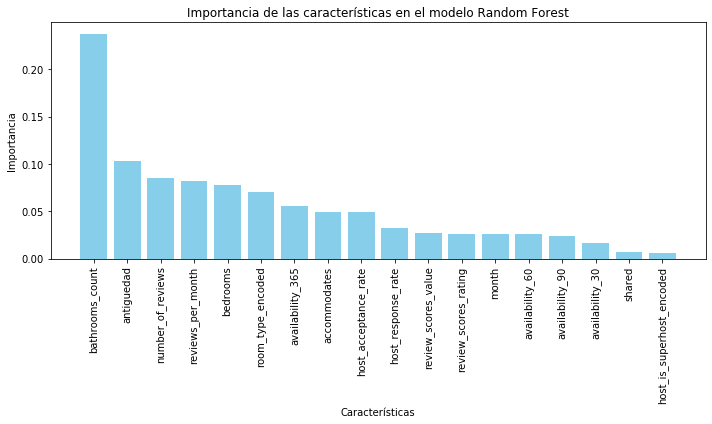

In [ ]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico a tus necesidades
plt.bar(importancias_df['caracteristica'], importancias_df['importancia'], color='skyblue')
plt.title('Importancia de las características en el modelo Random Forest')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para que sean legibles
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para dar un relleno adecuado
plt.show()

In [ ]:
price_train = np.mean(np.exp((y_train)))
price_test = np.mean(np.exp((y_test)))

price_train_pred = np.mean(np.exp((y_train_pred_best_rf)))
price_test_pred = np.mean(np.exp((y_test_pred_best_rf)))

In [ ]:
# Calcular la diferencia de error entre las predicciones y los valores reales en el conjunto de entrenamiento
error_train = price_train - price_train_pred

# Calcular el porcentaje de error en el conjunto de entrenamiento
percentage_error_train = (error_train / price_train ) * 100

# Calcular la diferencia de error entre las predicciones y los valores reales en el conjunto de prueba
error_test = price_test - price_test_pred

# Calcular el porcentaje de error en el conjunto de prueba
percentage_error_test = (error_test / price_test ) * 100

# Imprimir los resultados
print("Diferencia de error en el conjunto de entrenamiento:", error_train)
print("Porcentaje de error en el conjunto de entrenamiento:", percentage_error_train)
print("Diferencia de error en el conjunto de prueba:", error_test)
print("Porcentaje de error en el conjunto de prueba:", percentage_error_test)


Diferencia de error en el conjunto de entrenamiento: log_price    23.854276
dtype: float64
Porcentaje de error en el conjunto de entrenamiento: log_price    2.837575
dtype: float64
Diferencia de error en el conjunto de prueba: log_price    23.646199
dtype: float64
Porcentaje de error en el conjunto de prueba: log_price    2.828621
dtype: float64
